In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image

from datetime import datetime

In [2]:
# Time and robot egomotion
time = []
standardized_time = []
standardized_time2 = []
compass_heading = []
speed = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []
angular_z = []
roll = []
pitch = []

# wp data
wp_time = []
wp_seq = []

In [3]:
initial_time = None
time_crop = 880
time_crop1 = 630
time_crop2 = 780

# File loading from relative path
file = '../../../Data/ISER2021/Sunapee-20200805-path-3.csv'
# File loading from relative path
file2 = '../../../Data/ISER2021/Sunapee-20200805-path-3-mavros.csv'

# original data
with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        if initial_time is None:
            initial_time = float(row[0])
        
        current_time = float(row[0])
        
        if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        #if current_time - initial_time <= time_crop:
            time.append(float(row[0]))
            compass_heading.append(float(row[4]))
            speed.append(float(row[10]))
            roll.append(float(row[16]))
            pitch.append(float(row[17]))
            angular_z.append(float(row[18]))

            # sonde data
            temp.append(float(row[23]))
            PH.append(float(row[26]))
            cond.append(float(row[25]))
            chlorophyll.append(float(row[29]))
            ODO.append(float(row[31]))
            sonar.append(float(row[8]))


    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)

# wp data 
with open(file2, 'r') as csvfile2:
    csvreader2 = csv.reader(csvfile2, delimiter=',')
    header = next(csvreader2)
    for row in csvreader2:
        current_time = float(row[0])
        
        #if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        if current_time - initial_time <= time_crop:
            wp_time.append(float(row[0]))
            wp_seq.append(float(row[1]))
            
    for time_stamp in wp_time:
        standardized_time2.append(time_stamp - minimum_time)

In [4]:
wp_time

[1596649777.3681974,
 1596649885.4471474,
 1596650095.999091,
 1596650215.1548553,
 1596650472.8471029]

In [5]:
# collision time around 790

### Compass heading

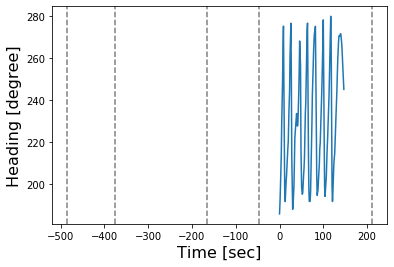

In [6]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Heading [degree]', fontsize=16)
ax1.plot(standardized_time, compass_heading, label='compass heading')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

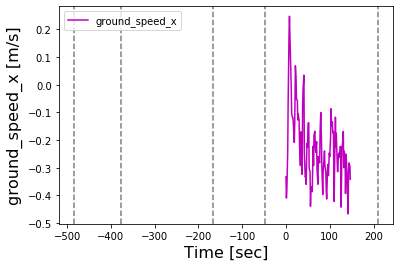

In [7]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed_x [m/s]', fontsize=16)
ax1.plot(standardized_time, speed, label='ground_speed_x', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

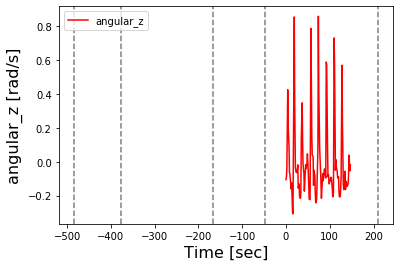

In [8]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('angular_z [rad/s]', fontsize=16)
ax1.plot(standardized_time, angular_z, label='angular_z', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

In [9]:
standardized_time2

[-484.6641764640808,
 -376.5852265357971,
 -166.033282995224,
 -46.87751865386963,
 210.81472897529602]

### Temperature

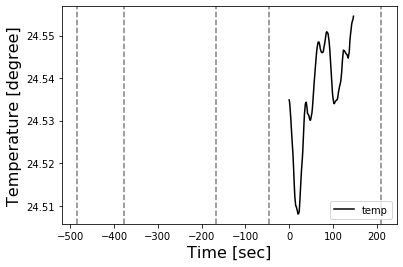

Standard Deviation of the temp is 0.012093268701840403 
Mean of the temp is 24.537014133525343 


In [10]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Temperature [degree]', fontsize=16)
ax1.plot(standardized_time, temp, label='temp', color='k')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(temp)))
print("Mean of the temp is % s " %(statistics.mean(temp))) 

### PH

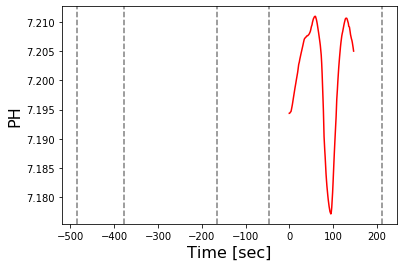

Standard Deviation of the temp is 0.010014932983130748 
Mean of the temp is 7.200884432162878 


In [11]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('PH', fontsize=16)
ax1.plot(standardized_time, PH, label='PH', color='r')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(PH)))
print("Mean of the temp is % s " %(statistics.mean(PH))) 

### Conductivity

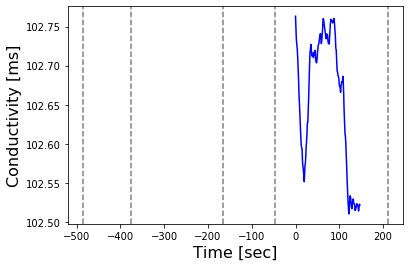

Standard Deviation of the chlorophyll is 0.08664357817700365 
Mean of the chlorophyll is 102.65860165290113 


In [12]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Conductivity [ms]', fontsize=16)
ax1.plot(standardized_time, cond, label='conductivity', color='b')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(cond)))
print("Mean of the chlorophyll is % s " %(statistics.mean(cond)))

### Chlorophyll 

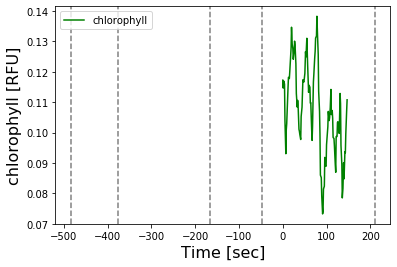

Standard Deviation of the chlorophyll is 0.014781057165664557 
Mean of the chlorophyll is 0.10743791694348713 


In [13]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('chlorophyll [RFU]', fontsize=16)
ax1.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(chlorophyll)))
print("Mean of the chlorophyll is % s " %(statistics.mean(chlorophyll))) 

### ODO

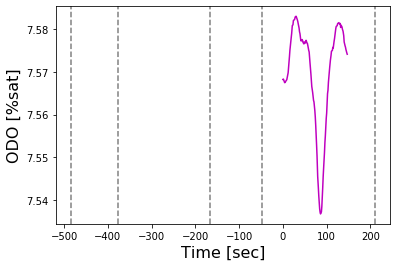

Standard Deviation of the DO is 0.01249311190978535 
Mean of the DO is 7.57009652425658 


In [14]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ODO [%sat]', fontsize=16)
ax1.plot(standardized_time, ODO, label='ODO', color='m')
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

### Sonar depth

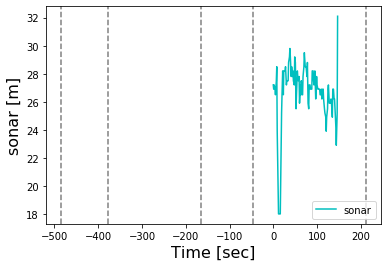

In [15]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('sonar [m]', fontsize=16)
ax1.plot(standardized_time, sonar, label='sonar', color='c')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

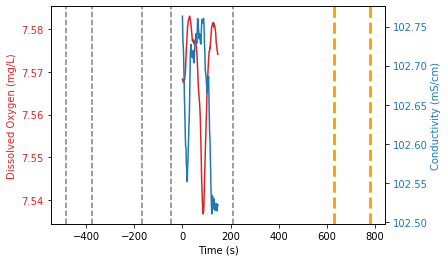

Standard Deviation of the DO is 0.01249311190978535 
Mean of the DO is 7.57009652425658 


In [16]:
# Figure initialization
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Dissolved Oxygen (mg/L)', color=color)
ax1.plot(standardized_time, ODO, label='ODO', color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Conductivity (mS/cm)', color=color)
ax2.plot(standardized_time, cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
plt.axvline(x=780, color='orange', linestyle='--', LineWidth=3)

plt.show()
fig.savefig('0805-boateffect-sensor.pdf', bbox_inches ='tight')

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

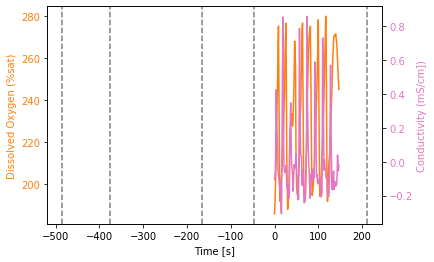

In [17]:
# Figure initialization
fig, ax1 = plt.subplots()
color = 'tab:orange'

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Dissolved Oxygen (%sat)', color=color)
ax1.plot(standardized_time, compass_heading, label='ODO', color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')

ax2 = ax1.twinx()

color = 'tab:pink'
ax2.set_ylabel('Conductivity (mS/cm])', color=color)
ax2.plot(standardized_time, angular_z, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yticks(np.arange(0.0, 8.0, 0.5))

plt.show()


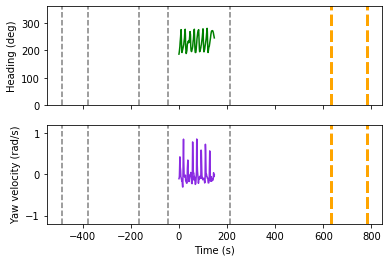

In [18]:
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
ax1.plot(standardized_time, compass_heading, color='green')
ax1.tick_params(axis='y')
ax1.tick_params(labelbottom=False)
ax1.set_ylim([0, 360])
ax1.set_ylabel('Heading (deg)')

ax2.plot(standardized_time, angular_z, color='blueviolet')
ax2.set_ylim([-1.2, 1.2])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Yaw velocity (rad/s)')

axis = (ax1, ax2)
for wp in standardized_time2:
    for each in axis:
        each.axvline(x=wp, color='gray', linestyle='--')
        each.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
        each.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
        
#ax1.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
#ax1.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
#ax2.axvline(x=630, color='orange', linestyle='--', LineWidth=3)
#ax2.axvline(x=780, color='orange', linestyle='--', LineWidth=3)
    
plt.show()
#fig.savefig('0805-boateffect-prioceptive.pdf', bbox_inches ='tight')

Text(0, 0.5, 'Pitch Velocity \n (rad/s)')

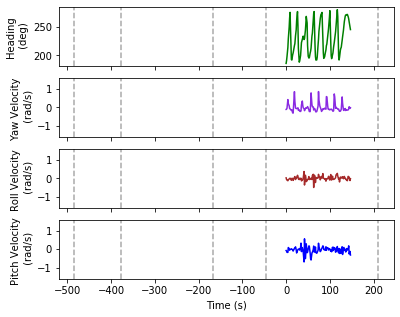

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(6,5))
#fig.suptitle('Vertically stacked subplots')

axis = (ax1, ax2, ax3, ax4)
for wp in standardized_time2:
    for each in axis:
        each.axvline(x=wp, color='darkgrey', linestyle='--')

ax1.plot(standardized_time, compass_heading, color='green')
ax1.tick_params(axis='y')
ax1.tick_params(labelbottom=False)
#ax1.set_ylim([0, 360])
ax1.set_ylabel('Heading \n (deg)')


ax2.plot(standardized_time, angular_z, color='blueviolet')
ax2.set_ylim([-1.6, 1.6])
#ax2.set_xlabel('Time (s)')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('Yaw Velocity \n (rad/s)')

ax3.plot(standardized_time, roll, color='brown')
ax3.set_ylim([-1.6, 1.6])
#ax3.set_xlabel('Time (s)')
ax3.tick_params(labelbottom=False)
ax3.set_ylabel('Roll Velocity \n (rad/s)')

ax4.plot(standardized_time, pitch, color='blue')
ax4.set_ylim([-1.6, 1.6])
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Pitch Velocity \n (rad/s)')

#fig.savefig('1006-china-turning-entire.pdf', bbox_inches ='tight')